# Implementing Boston housing dataset using Linear Regression

This program is used to find the expected price of a house in boston using boston housing dataset using linear regression method  by setting  up a target data and a test data formed by dividing the given data into two parts.

Importing numpy library ( contains basic python programming functions) 
Importing pandas library (used to analyse data) 
matplotlib is a library used to plot the data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

Import Boston housing data from sklearn datasets where Boston variable itself is a dictionary.

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()

In [16]:
print(boston.keys()) # getting the keys 

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


check shape of dataset and return size of dataset with the column size

In [17]:
print(boston.data.shape)

(506, 13)


this gives 506 rows and 13 columns

In [25]:
print(boston.feature_names)              #  Get column names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Discription of dataset

In [30]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

converting Dataset into pandas 
call pd.DataFrame() method 
and pass boston.data
USE bos.head to get first 5 (0-4) data of boston house

In [27]:
bos = pd.DataFrame(boston.data)

In [29]:
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


converting column index into names

In [31]:
bos.columns = boston.feature_names 

In [32]:
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


checking shape of target column i.e PRICE

In [33]:
boston.target.shape

(506,)

Adding PRICE column to the above DataFrame

In [36]:
bos['PRICE'] = boston.target

In [37]:
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


Summary statistics of dataframe

In [39]:
print(bos.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Split tarin test Dataset

split dataset into target value and predictor value
Target value = Y (Boston Housing Price)
Predictor value = X (all other features)

In [45]:
X = bos.drop('PRICE' , axis = 1)
Y = bos['PRICE']

In [53]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33 ,random_state = 101)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


 IMPORTING AND RUNNING LINEAR REGRESSION 


In [56]:
from sklearn.linear_model import  LinearRegression

In [59]:
lm = LinearRegression()

Fit the dataset to linear regression model 

and pass only the training data to fit.

In [84]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict the trained data values for X and Y and plot it using matplotlib

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

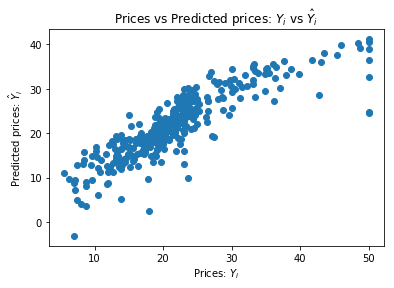

In [82]:
Y_pred = lm.predict(X_train)

plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Check level of error by Mean Squared method .
# Finds average of squares of error
# Basically checks diffrence between actual value and predicted value. 

In [87]:
from sklearn.metrics import mean_squared_error

In [89]:
mse = mean_squared_error(Y_train, Y_pred)
print(mse)

19.044581356060373
